## Анализ данных  Google Play Market

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
sns.set(style="darkgrid")

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] =15, 8
import pandas as pd


## Импорт данных

In [32]:
# Импортируем данные  stat  inpit
#https://www.kaggle.com/lava18/google-play-store-apps
app_data = pd.read_csv("googleplaystore.csv")
app_data.columns = ["app", "category", "raiting", "reviews", "size", "installs","type","price","content_raiting","geners","last_updated","current_ver","android_ver"]
#app_data['datestamp'] =  pd.to_datetime(app_data['last_updated'])
#нормализуем немного
app_data['installs_int'] = app_data['installs'].str.replace('+','')
app_data['installs_int'] = app_data['installs_int'].str.replace(',','')
app_data['installs_int'] = app_data['installs_int'].str.replace('Free','0')
app_data['installs_int'] = pd.to_numeric(app_data['installs_int'])
app_data.raiting.fillna(0, inplace=True)
#app_data.type_of_connection.fillna(0, inplace=True)

## 15 Приложений по отзывам

In [16]:
app_data.sort_values("reviews", ascending=False).head(15)

,app,category,raiting,reviews,size,installs,type,price,content_raiting,geners,last_updated,current_ver,android_ver,installs_int
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,1000000
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,100000
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,1000000
2705,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,1000000
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,1000000
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,"500,000+",Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,500000
3049,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,1000000
7002,Adult Color by Number Book - Paint Mandala Pages,FAMILY,4.3,997,Varies with device,"100,000+",Free,0,Everyone,Entertainment,"June 27, 2018",2.4,4.1 and up,100000
6724,BSPlayer ARMv7 VFP CPU support,VIDEO_PLAYERS,4.3,9966,5.5M,"1,000,000+",Free,0,Everyone,Video Players & Editors,"March 31, 2017",1.23,2.1 and up,1000000
7982,"Easy Resume Builder, Resume help, Curriculum v...",TOOLS,4.3,996,10M,"50,000+",Free,0,Everyone,Tools,"September 28, 2017",2.3,4.0.3 and up,50000


## Количество установок приложений для транспортных средств в зависимости от версии Android

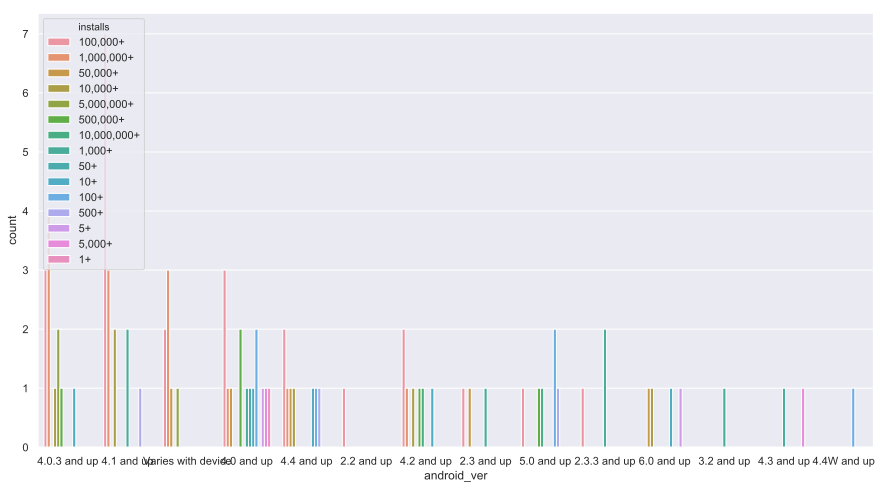

In [33]:
g = sns.countplot(
    x="android_ver", hue="installs",
    data=app_data[app_data.geners=="Auto & Vehicles"]
)

In [34]:
app_data.installs_int.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

## Топ-20 в категории 18+

<Figure size 1080x576 with 0 Axes>

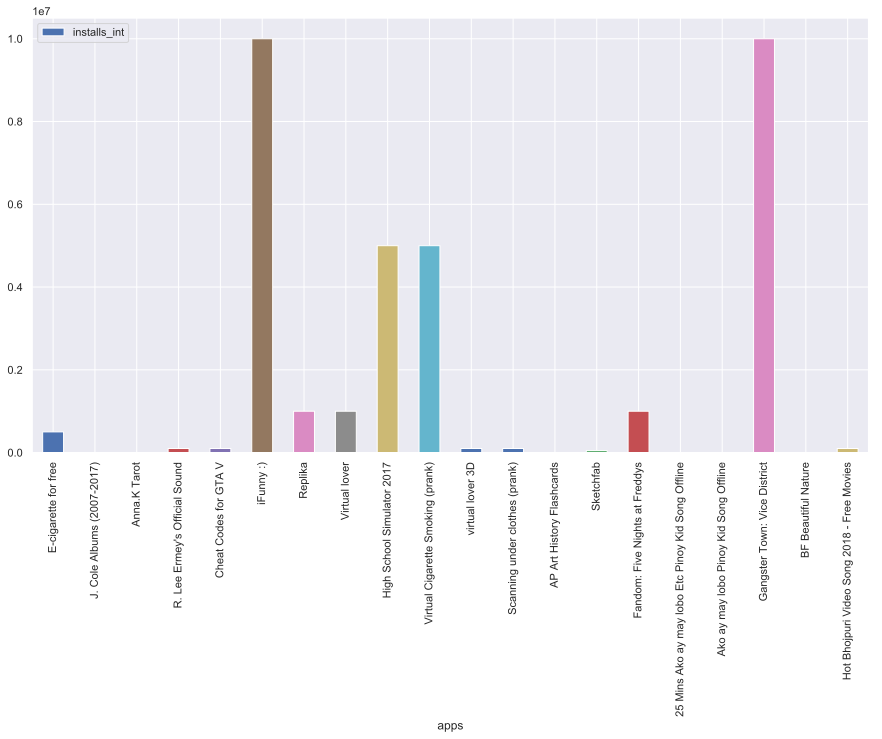

In [36]:
#app_data[app_data.category=="COMMUNICATION"].sort_values("installs", ascending=False).head(10)
#app_data.installs.unique()
fig = plt.figure()
df4 = pd.DataFrame(app_data[(app_data.content_raiting=="Mature 17+") & (app_data.category=="FAMILY")].head(20))
df = pd.DataFrame({'apps':df4['app'].tolist(), 'installs_int': df4['installs_int'].tolist()})
ax = df.plot.bar(x='apps', y='installs_int', rot=90)

In [37]:
fig = ax.get_figure()
fig.savefig('top20_18.png')

## Топ-20 приложений в категории коммуникации

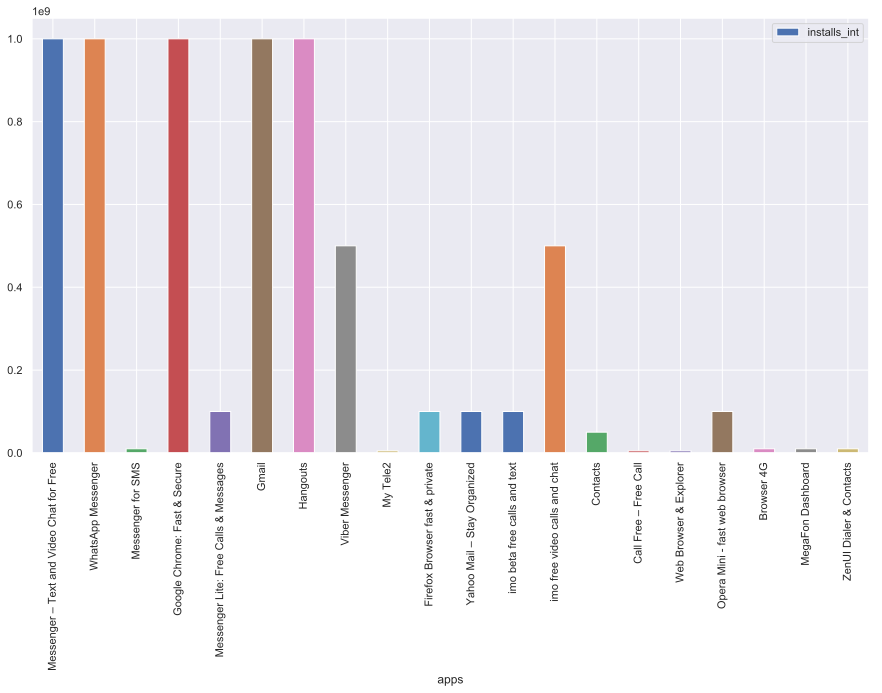

In [38]:
df4 = pd.DataFrame(app_data[app_data.category=="COMMUNICATION"].head(20))
df = pd.DataFrame({'apps':df4['app'].tolist(), 'installs_int': df4['installs_int'].tolist()})
ax = df.plot.bar(x='apps', y='installs_int', rot=90)

## Топ-20 платных приложений в категории 18+

In [42]:
df4 = pd.DataFrame(app_data[(app_data.content_raiting=="Mature 17+") & (app_data.type=="Paid")].head(20))
df4

,app,category,raiting,reviews,size,installs,type,price,content_raiting,geners,last_updated,current_ver,android_ver,installs_int
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,10000
481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2,17M,100+,Paid,$7.99,Mature 17+,Dating,"January 21, 2017",1.0.1,4.0 and up,100
571,"Moco+ - Chat, Meet People",DATING,4.2,1546,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,10000
1001,Meme Generator,ENTERTAINMENT,4.6,3771,53M,"100,000+",Paid,$2.99,Mature 17+,Entertainment,"August 3, 2018",4.426,4.1 and up,100000
2252,Essential Anatomy 3,MEDICAL,4.1,1533,42M,"50,000+",Paid,$11.99,Mature 17+,Medical,"August 7, 2014",1.1.3,4.0.3 and up,50000
2386,Essential Anatomy 3,MEDICAL,4.1,1533,42M,"50,000+",Paid,$11.99,Mature 17+,Medical,"August 7, 2014",1.1.3,4.0.3 and up,50000
4034,Hitman Sniper,GAME,4.6,408292,29M,"10,000,000+",Paid,$0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,10000000
4190,H*nest Meditation,LIFESTYLE,4.9,145,48M,"5,000+",Paid,$1.99,Mature 17+,Lifestyle,"April 7, 2016",1.0,4.0.3 and up,5000
4316,Anna.K Tarot,FAMILY,4.8,17,23M,100+,Paid,$3.99,Mature 17+,Entertainment,"January 16, 2017",1.4.4,4.0.3 and up,100
4491,"Q Alerts: QAnon Drop Notifications, Research +++",NEWS_AND_MAGAZINES,4.7,143,26M,"5,000+",Paid,$0.99,Mature 17+,News & Magazines,"July 26, 2018",4.1.10,4.1 and up,5000
